# 20. Valid Parentheses
Given a string containing just the characters '(', ')', '{', '}', '[' and ']', determine if the input string is valid.

An input string is valid if:

Open brackets must be closed by the same type of brackets.
Open brackets must be closed in the correct order.
Note that an empty string is also considered valid.

<div class="alert alert-block alert-info">
Example 1: <br>

Input: "()" <br>
Output: true

Example 2:

Input: "()[]{}" <br>
Output: true

Example 3:

Input: "(]" <br>
Output: false

Example 4:

Input: "([)]" <br>
Output: false
</div>
## Approach 1: Stacks
An interesting property about a valid parenthesis expression is that a sub-expression of a valid expression should also be a valid expression. (Not every sub-expression) e.g.
![20-Valid-Parentheses-Recursive-Property.png](attachment:20-Valid-Parentheses-Recursive-Property.png)

Also, if you look at the above structure carefully, the color coded cells mark the opening and closing pairs of parenthesis. The entire expression is valid, but sub portions of it are also valid in themselves. This lends a sort of a recursive structure to the problem. For e.g. Consider the expression enclosed within the two green parenthesis in the diagram above. The opening bracket at index 1 and the corresponding closing bracket at index 6.

What if whenever we encounter a matching pair of parenthesis in the expression, we simply remove it from the expression?

Let's have a look at this idea below where remove the smaller expressions one at a time from the overall expression and since this is a valid expression, we would be left with an empty string in the end.

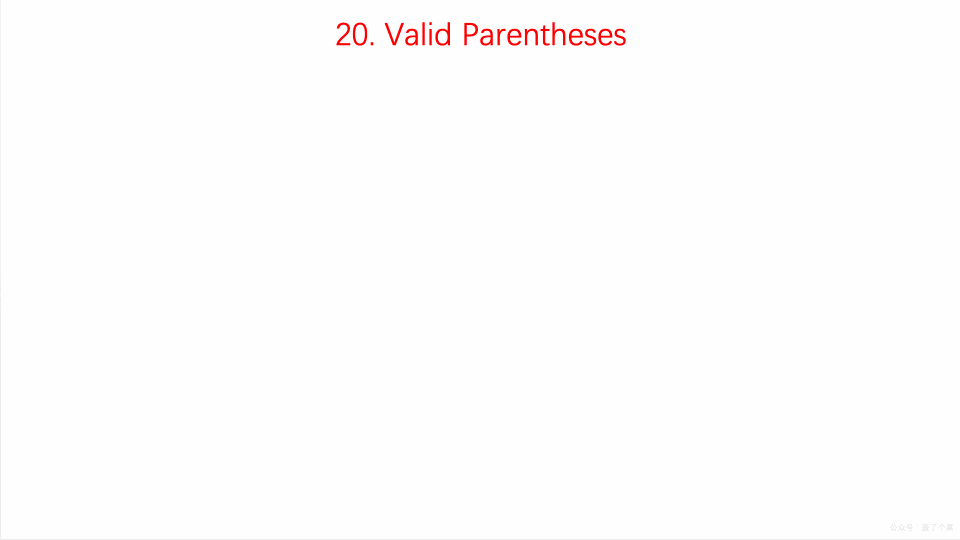
https://camo.githubusercontent.com/49e777a727ec75398bd9a114ec4fce0407efe321/68747470733a2f2f6275636b65742d313235373132363534392e636f732e61702d6775616e677a686f752e6d7971636c6f75642e636f6d2f32303138313130383131313132342e676966

The stack data structure can come in handy here in representing this recursive structure of the problem. We can't really process this from the inside out because we don't have an idea about the overall structure. But, the stack can help us process this recursively i.e. from outside to inwards.

Let us have a look at the algorithm for this problem using stacks as the intermediate data structure.

Algorithm

1. Initialize a stack S.
2. Process each bracket of the expression one at a time.
> If we encounter an opening bracket, we simply push it onto the stack. This means we will process it later, let us simply move onto the sub-expression ahead.
> If we encounter a closing bracket, then we check the element on top of the stack. If the element at the top of the stack is an opening bracket of the same type, then we pop it off the stack and continue processing. Else, this implies an invalid expression.
3. In the end, if we are left with a stack still having elements, then this implies an invalid expression.

In [ ]:
def isValid(s):
    """
    :type s: str
    :rtype: bool
    """
    #stack to keep track of opening brackets
    stack = []
    # map for keeping track of mapping to keep clean code
    mapping = {")":"(","}":"{","]":"["}
    for bracket in s:
        if bracket in mapping: # if character is an closing bracket
            # pop the topmost element from stack, if it is non empty
            top_element = stack.pop() if stack else '#'
            if top_element != mapping[bracket]:
                return False
        else:
            #we have an opening bracket, just push it onto the stack
            stack.append(bracket)
    return not stack

print(isValid())